<a href="https://colab.research.google.com/github/sangeethaskumar2020/sangeethaskumar2020/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv.zip")

# Clean column names (remove spaces & convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Check if 'churn' column exists
if 'churn' not in df.columns:
    print("Error: 'churn' column not found. Available columns:", df.columns)
else:
    # Fill missing values for numeric columns only
    numeric_cols = df.select_dtypes(include=np.number).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # Convert categorical variables
    df = pd.get_dummies(df, drop_first=True)

    # Features & Target
    X = df.drop("churn", axis=1)
    y = df["churn"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9964271844660194


Random Forest Accuracy: 0.9964271844660194
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6793
           1       1.00      0.99      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Confusion Matrix:
 [[6790    3]
 [  43 6039]]
XGBoost Accuracy: 0.9999223300970874
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Confusion Matrix:
 [[6792    1]
 [   0 6082]]


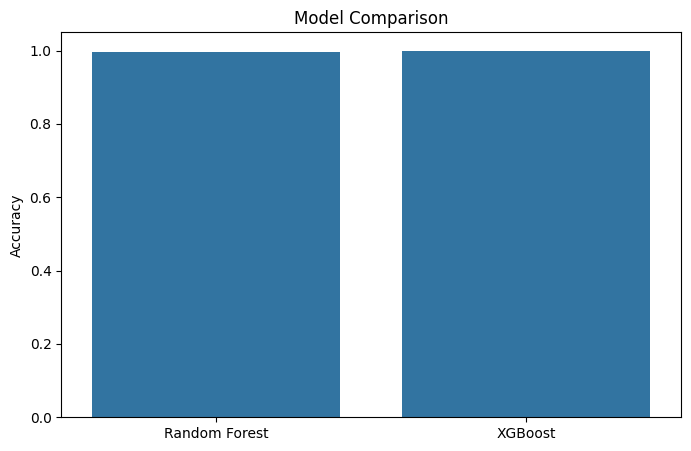

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv.zip")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check for missing values and fill only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill missing values

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop("churn", axis=1)
y = df["churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Train XGBoost Model (Fixed Warning)
xgb_model = XGBClassifier(eval_metric='logloss')  # Removed use_label_encoder=False
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Compare Results
models = ["Random Forest", "XGBoost"]
accuracies = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)]
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()
